# Introduction

Ceci est un projet dans le cadre du cours de Data. Le sujet de ce projet est le jeu League of Legends. Le but est de faire des études statistiques à l'aide d'un jeu de données et de créer des data-modèles pour prédire la victoire d'une équipe.

Dans un premier temps, nous présenterons le jeu League of Legends en parcourant divers aspects du jeu comme la durée d'une partie, le résultat des parties, les personnages que peuvent utiliser les joueurs, etc. 

Dans un second temps, nous ferons l'étude des corrélations pour savoir avec quelles données construire nos data-modèles. 

Dans un dernier temps, nous construirons des modèles de régression et de classification pour prédire notre cible qui sera l'issue d'une partie (victoire ou défaite).

# Lien du jeu de données

https://www.kaggle.com/datasnaek/league-of-legends

# Données


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Philippe_Pinçon_Projet_Data/games.csv')
ch_info1 = pd.read_json('/content/drive/My Drive/Colab Notebooks/Philippe_Pinçon_Projet_Data/champion_info.json')
ch_info2 = pd.read_json('/content/drive/My Drive/Colab Notebooks/Philippe_Pinçon_Projet_Data/champion_info_2.json')
sum_spell_info = pd.read_json('/content/drive/My Drive/Colab Notebooks/Philippe_Pinçon_Projet_Data/summoner_spell_info.json')
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18


Liste des variables utilisées (nous reviendrons sur leurs significations dans toutes les parties du notebook) : 

gameDuration, winner, firstBlood, firstTower, firstInhibiot, firstBaron, firstDragon, firstRiftHerald, t1_champ1id,	t1_champ1_sum1, 	t1_champ1_sum2, 	t1_champ2id, 	t1_champ2_sum1, 	t1_champ2_sum2, 	t1_champ3id, 	t1_champ3_sum1, 	t1_champ3_sum2, 	t1_champ4id, 	t1_champ4_sum1, 	t1_champ4_sum2, 	t1_champ5id, 	t1_champ5_sum1, 	t1_champ5_sum2, 	t1_towerKills, 	t1_inhibitorKills, 	t1_baronKills, 	t1_dragonKills, 	t1_riftHeraldKills, 	t1_ban1, 	t1_ban2, 	t1_ban3, 	t1_ban4, 	t1_ban5, 	t2_champ1id, 	t2_champ1_sum1, 	t2_champ1_sum2, 	t2_champ2id, 	t2_champ2_sum1, 	t2_champ2_sum2, 	t2_champ3id, 	t2_champ3_sum1, 	t2_champ3_sum2, 	t2_champ4id, 	t2_champ4_sum1, 	t2_champ4_sum2, 	t2_champ5id, 	t2_champ5_sum1, 	t2_champ5_sum2, 	t2_towerKills, 	t2_inhibitorKills,	t2_baronKills, 	t2_dragonKills, 	t2_riftHeraldKills, 	t2_ban1, 	t2_ban2, 	t2_ban3, 	t2_ban4, 	t2_ban5.

# Présentation du jeu League of Legends

![Texte alternatif…](https://drive.google.com/uc?export=view&id=1qHjEpGeWbIk4hBh3NKnwzUyyw56x1fM_)

League of Legends (LoL) est un jeu multijoueur compétitif joués par des millions de personnes à travers le monde.
Dans une partie de League of Legends il y a 10 joueurs formant 2 équipes de 5. Les joueurs sont appelés les invocateurs, mais le terme joueur est plus souvent employé.

### Vidéo de présentation

Voici une vidéo présentant les fondamentaux du jeu: 
https://www.youtube.com/watch?v=WD9qgO0jo-M. Je vous encourage fortement à la regarder.
Cette vidéo dure 5 minutes et 34 secondes. Ce ne sera absolument pas du temps perdu que de la regarder puisqu'elle vous donnera des bases solides pour comprendre comment fonctionne le jeu et toute la stratégie qu'il y a derrière. 
Beaucoup d'explications sont données et rappelées à plusieurs reprises dans ce notebook.


### Préambule

L'analyse effectuée tout au long de ce notebook porte sur plus de 50 000 parties classées de la saison 9. Nous n'avons aucune information sur le nom ou le classement des joueurs. Cependant il s'agit de parties dites "classées" qui voient s'affronter des joueurs supposés être de niveau équivalent grâce au système de matchmaking. Ainsi, les données récoltées ne sont pas faussées par des joueurs qui seraient plus forts que les autres.

# Durée d'une partie

**Déroulement d'une partie :**

L'objectif est de détruire le *nexus* de la base adverse. Pour atteindre cette objectif, il est nécessaire de détruire les défenses de la base adverse. Chaque équipe dispose de 9 tourelles et de 3 inhibiteurs placées stratégiquement sur les 3 chemins de la carte. Enfin, 2 tourelles sont placées devant le nexus et constituent les dernières défenses de chaque base. Voici une carte représentant la zone de jeu :

![Texte alternatif…](https://assets.sport.francetvinfo.fr/sites/default/files/styles/large_16_9/public/2019-11/league-of-legends_0.jpg?h=0dbe07ae&itok=k8rVNILE)

On peut distinguer 3 grandes phases de jeu au cours d'une partie :

*   Première phase : l'***early-game***. Les joueurs se répartissent sur la carte selon le rôle qui leur est attribué. Il y 1 joueur sur la voie du haut (toplaner), 1 joueur sur la voie du milieu (midlaner), 2 joueurs sur la voie du bas (botlaners) et 1 joueur dans la jungle (jungler). Pendant les premières minutes de la partie, les joueurs obtiennent de l'expérience et de l'or en tuant des sbires et des monstres tout en combattant leurs adversaires qui font exactement la même chose. L'objectif est d'accumuler plus d'or et de points d'experience que son adversaire afin d'acheter plus d'équipements et d'améliorer ses compétences le plus possible. Si vous êtes mieux équipé et plus haut niveau que votre adversaire, il vous sera alors plus facile de le tuer et ainsi d'attaquer sa base.
*   Deuxième phase : le ***mid-game***. Les joueurs d'une même équipe commencent à se rassembler afin de prendre des objectifs stratégiques (Tourelles, Héraut de la Faille, Dragons, ...). Cette phase voit commencer les premiers combats de groupe (teamfight) entre les joueurs. Il est également important de continuer à prendre de l'expérience et de l'or en tuant des monstres sur les différentes voies.
*   Troisième phase : le ***late-game*** Les tourelles et défenses extérieures sont tombées. Les joueurs ont alors accumulés beaucoup d'expériences et d'équipements. Toutes les batailles et escarmouches se font en équipe et sont décisives. Elles visent à détruire totalement la base adverse et remporter la partie. Des objectifs neutres très puissants sont disputés (Baron Nashor, Dragon Ancestral) car ils donnent un énorme avantage à l'équipe qui les obtient.




Voici les deux moyens de mettre fin à une partie sans détruire le nexus adverse :


*   Le ***Remake*** : La commande `/remake` permet de proposer un vote à votre équipe pour mettre fin à la partie au début de celle-ci si un de vos allié est déconnecté de la partie. Personne n'a envie de commencer une partie compétitive avec le désavantage de jouer en infériorité numérique. \\
Cette commande devient disponible à 3 minutes de jeu si un joueur est déconnecté ou marqué comme inactif pendant 90 secondes. L'équipe désavantagée dispose alors de 60 secondes pour proposer un vote en tapant la commande /remake dans la messagerie du jeu. \\
Dans un 4c5 (4 contre 5), au moins 2 joueurs doivent voter oui pour que le match s'arrête. Dans un 3c5 ou moins, il suffit qu'un seul joueur vote oui pour mettre un terme à la partie. \\
Cependant, si un joueur meurt avant qu'un joueur ne se déconnecte ou soit inactif, la commande `/remake` ne sera plus disponible. \\
Si un vote de remake est validé, aucune équipe n'est pénalisée par une défaite ou gratifiée par une victoire. Aucun point de ligue n'est perdu ou octroyé. Seul le joueur déconnecté se voit attribuer une défaite et une perte de point de ligue.


*   La ***Reddition*** : La commande `/surrender` permet de proposer un vote à votre équipe pour mettre fin à la partie à partir de 15 min de jeu. N'importe quel membre d'une équipe peut proposer un vote de reddition si il pense que son équipe ne peut plus gagner la partie. \\
Entre 15-20 minutes, si un vote de reddition est proposé au sein d'une équipe, tous les joueurs doivent voter oui pour que celui-ci soit validé. À partir de 20 minutes, 4 joueurs sur les 5 doivent voter oui pour que le vote soit validé. \\




Étudions la durée des parties :

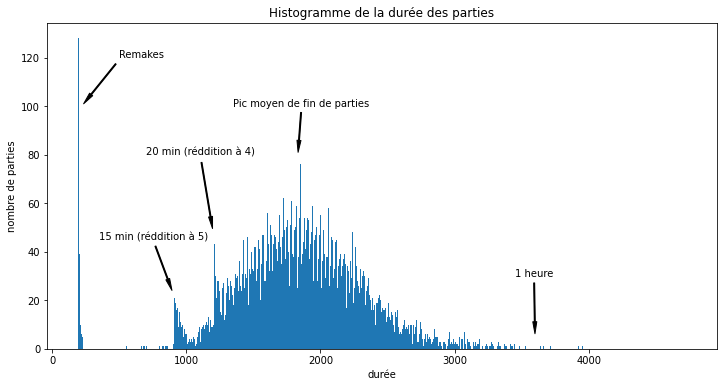

In [ ]:
""" On construit une petite dataframe pour étudier la durée des parties. """
Time = ['gameDuration']  # on récupère la colonne de durée des parties

Tab_Time = df[Time].apply(pd.value_counts) # on compte le nombre de parties d'une durée x
Tab_Time.columns = ['Nombres de parties']  # on renomme la colonne pour plus de clarté
Tps_parties = list(Tab_Time.index)

""" On construit l'histogramme de la durée des parties """
fig=plt.figure(figsize=(12,6))
plt.title('Histogramme de la durée des parties',color='black');
plt.bar(Tps_parties,Tab_Time['Nombres de parties'],width=1);

# annotations sur le graphique
plt.annotate('Remakes',xy=(220, 100), xytext=(500, 120), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4))
plt.annotate('15 min (réddition à 5)',xy=(900,23),xytext=(350,45), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4))
plt.annotate('20 min (réddition à 4)',xy=(1200,48),xytext=(700,80), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4))
plt.annotate('Pic moyen de fin de parties',xy=(1832,80),xytext=(1350,100), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4))
plt.annotate('1 heure',xy=(3600, 5), xytext=(3450, 30), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4))

plt.yticks(color='black')
plt.xticks(color='black')
plt.ylabel('nombre de parties', color='black');
plt.xlabel('durée',color='black');

In [ ]:
""" Calculons la durée moyenne d'une partie """
tps_moyen = np.mean(df['gameDuration'])
tps_moyen

1832.3628083122937

**Analyse du graphique :**

*   Le premier pic entre 3 et 4 minutes correspond aux remakes.
*   Quelques parties après 4 minutes se terminent avant 15 minutes ce qui est très rare. Une équipe a surpassé l'autre très rapidement et certains joueurs de l'équipe adverse ont sans doute arrêté de jouer pour laisser l'autre équipe finir la partie.
*   On observe un deuxième pic à 15 minutes qui correspond aux premières rédditions. 
*   On observe un troisième pic à 20 minutes qui correspond également à beaucoup de rédditions vu que la réddition à 4 joueurs est débloquée.
*   La durée moyenne d'une partie est 1832 secondes, soit 30 minutes et 32 secondes.



# Résultats des parties

Dans la partie précédente, nous avons expliqué le déroulement globale d'une partie de jeu. Vous avez sans doute remarquez que la carte était symétrique par rapport au point central de la carte.

On distingue les 2 équipes :
*   Équipe 1
*   Équipe 2

L'équipe 1 a pour base celle au sud-ouest. On appelle ce côté de la carte ***Blueside***.

L'équipe 2 a pour base celle au nord-est. On appelle ce côté de la carte ***Redside***.

Je rappelle que dans toutes les parties étudiées, les joueurs sont différents d'une partie à l'autre et ne se connaissent pas ou très peu. Les parties que nous étudions sont des parties classées de type Solo/Duo. Les joueurs peuvent rechercher une partie tout seul ou avec un ami. Une fois la partie trouvée, tous les joueurs sont avec d'autres joueurs qu'ils ne connaissent pas, excepté une personne si ils ont recherché une partie avec un ami.



La deuxième différence importante entre les deux équipes 1 et 2, c'est pendant la phase de sélection des champions. 

Expliquons ce qui précède la partie de jeu :

Un joueur recherche une partie via ce qu'on appellera le menu principal du jeu. Dans ce menu, vous pouvez discuter avec vos amis, regarder votre profil ou ceux des autres joueurs, acheter des champions (personnages) que vous pourrez jouer ensuite dans vos futures parties, ..., et rechercher une partie de jeu !

Une fois que vous avez lancé votre recherche et attendu quelques instants, vous trouvez une partie. 

Vous voilà enfin dans une partie. Mais avant, tous les joueurs doivent choisir un champion (personnage) avec lequel ils vont jouer leur partie. C'est ce que qu'on appelle la phase de sélection des champions. Dans League of Legends, il y a environ 150 champions avec lesquels vous pouvez jouer.

Tous les joueurs ont le droit de bannir un champion contre lequel ils ne veulent pas jouer. Une fois la phase de bannissement terminée, les joueurs choisissent chacun leur tour leurs champions. 

L'équipe 1 (équipe *Blueside*) aura le tout premier choix. Ensuite l'équipe 2 (équipe *Redside*) choisit 2 champions. Puis c'est au tour de l'équipe 1 (équipe *Blueside*) de choisir 2 champions. Et on continue ainsi de suite. L'équipe 2 (équipe *Redside*) aura le tout dernier choix. 

Ensuite, la partie se lance pour de bon. Vous voilà sur la carte appelée ***Faille de l'invocateur***, prêt à en découdre avec vos adversaires.

Voilà, vous savez maintenant les principales différences entre les équipes 1 *Blueside* et 2 *Redside*. 

Si l'équipe 1 a le tout premier choix, vous pouvez vous dire que cette équipe pourra choisir le champion le plus fort (le plus *cheaté* comme on aime bien le dire 🙂). C'est vrai, mais l'équipe 2 ayant le tout dernier choix pourra choisir le parfait champion pour contrer toute l'équipe adverse. 

Les développeurs de League of Legends équilibrent le jeu par des mise à jour régulières. Globalement, le jeu est bien équilibré.

L'analyse faite tout au long du notebook se concentre principalement sur les évènements qui surviennent au cours de la partie et non avant. Nous étudions des parties de jeu d'amateurs et non de professionnels. Si mon analyse portait sur des parties de jeu de professionnels, elle serait différente car chaque détails compte. Dans une partie d'amateur c'est moins le cas, bien que ces parties soient compétitives et rapportent des points au classement général des joueurs.

La phase de sélection des champions est super importante dans des compétitions professionnelles. C'est beaucoup moins le cas pour des parties classées d'amateurs. Tous les joueurs ne maitrisent pas de la même façon tous les champions. Voilà pourquoi nous n'analyserons que très peu l'impact des champions (personnages) que jouent les joueurs dans les parties. 

Regardons les résultats des parties.

In [ ]:
""" Récupérons la colonne 'winner' indiquant quelle équipe a gagné chaque partie """
Victory_Col_Df = ['winner']

Victory_Info = df[Victory_Col_Df].apply(pd.value_counts)

Victory_Info

,winner
1,26077
2,25413


Il n'y a malheureusement pas de 3ème valeur dans la colonne 'winner' pour comptabiliser les remakes. Bien que la personne absente obligeant ses alliés à proposer un vote pour remake reçoit une défaite, les 9 autres joueurs n'obtiennent ni défaite, ni victoire. Le jeu indique clairement dans l'historique des parties des joueurs si une partie s'est terminé en remake. 

Il serait peut être judicieux d'enlever les parties avec une durée inférieure à 4 minutes afin d'étudier le plus précisement possible les paramètres qui impactent la victoire des joueurs.

Il s'agit de 1195 parties sur 51490 parties. (environ 2,32 % des parties)
Pour étudier au mieux les paramètres impactant la victoire d'une équipe, nous allons enlever toutes les parties qui ont remake (voir les parties : étude des corrélations, ...).

Néanmois, on va garder les données des parties qui ont remake pour l'étude du choix des sortilèges d'invocateurs ou des champions. Dans ces deux domaines, la victoire ne nous intéresse pas, on cherche plutôt à savoir quels sortilèges sont populaires par exemple.

Affichons plus précisement l'histogramme de durée des parties zoomé sur les remakes entre 3 et 4 minutes.

In [ ]:
remakes = df.loc[df["gameDuration"]<240]
remakes

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
64,3258796399,1499719924936,197,9,2,0,0,0,0,0,0,111,4,3,19,4,11,51,4,7,80,4,14,245,12,4,0,0,0,0,0,105,154,67,114,498,22,7,4,79,11,4,143,14,4,240,12,4,55,4,14,0,0,0,0,0,157,7,114,154,8
82,3330152268,1504559761914,193,9,1,1,0,0,0,0,0,63,4,14,122,4,12,121,11,4,18,7,4,99,4,3,0,0,0,0,0,86,113,24,222,7,5,4,11,106,4,12,29,4,7,112,4,14,89,3,14,0,0,0,0,0,11,238,86,157,31
119,3246799766,1498919798084,192,9,1,1,0,0,0,0,0,61,6,4,77,4,11,119,4,7,412,4,14,23,6,14,0,0,0,0,0,154,54,105,498,157,245,4,14,420,4,12,22,4,7,497,3,4,64,4,11,0,0,0,0,0,103,122,105,117,29
149,3284885837,1501465757099,208,9,1,1,0,0,0,0,0,64,11,4,127,4,12,21,4,7,23,12,4,16,4,3,0,0,0,0,0,31,412,6,150,131,86,4,14,18,4,7,141,4,11,43,3,4,55,14,4,0,0,0,0,0,31,157,11,119,150
276,3303374774,1502719079210,201,9,1,1,0,0,0,0,0,4,6,4,56,4,11,41,12,4,89,4,3,18,7,4,0,0,0,0,0,75,157,119,141,154,86,4,12,498,4,7,14,4,12,76,4,11,134,6,4,0,0,0,0,0,67,17,238,31,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51271,3324791171,1504190733403,191,9,1,0,0,0,0,0,0,18,4,7,238,4,14,141,11,4,38,12,4,53,4,3,0,0,0,0,0,91,254,119,40,157,103,14,4,2,12,4,117,3,4,22,4,7,19,4,11,0,0,0,0,0,157,516,24,245,267
51359,3323948503,1504111359658,202,9,1,2,0,0,0,0,0,32,11,4,36,4,12,99,14,4,57,3,4,96,4,7,0,0,0,0,0,53,31,157,55,245,18,7,4,110,4,14,11,6,21,78,4,21,141,11,4,0,0,0,0,0,113,31,25,238,119
51412,3252578270,1499293935789,194,9,2,2,0,0,0,0,0,55,4,14,23,12,4,412,14,4,32,11,4,18,7,4,0,0,0,0,0,38,11,498,51,117,236,4,7,5,4,11,53,4,3,240,4,12,245,4,12,0,0,0,0,0,154,157,114,119,117
51417,3282153758,1501271424076,197,9,2,0,0,0,0,0,0,90,6,4,92,4,12,12,3,4,98,11,4,18,7,4,0,0,0,0,0,122,31,40,154,38,57,11,4,223,4,14,67,4,7,23,12,4,61,6,4,0,0,0,0,0,119,80,117,498,157


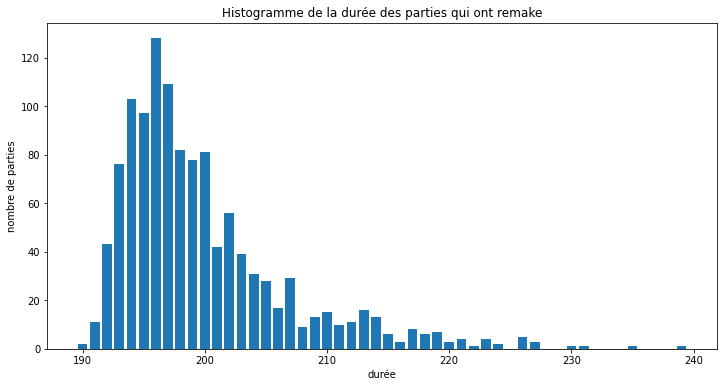

In [ ]:
""" Affichons l'histogramme de durée des parties qui ont remakes """
Tab_Time_Remakes = remakes[Time].apply(pd.value_counts) # on compte le nombre de parties d'une durée x
Tab_Time_Remakes.columns = ['Nombres de parties']  # on renomme la colonne pour plus de clarté
Tps_parties_Remakes = list(Tab_Time_Remakes.index)

""" On construit l'histogramme de la durée des parties qui ont remake """
fig=plt.figure(figsize=(12,6))
plt.title('Histogramme de la durée des parties qui ont remake',color='black');
plt.bar(Tps_parties_Remakes,Tab_Time_Remakes['Nombres de parties']);

plt.yticks(color='black')
plt.xticks(color='black')
plt.ylabel('nombre de parties', color='black');
plt.xlabel('durée',color='black');

In [ ]:
Victory_Info_remakes = remakes[Victory_Col_Df].apply(pd.value_counts)

Victory_Info_remakes

,winner
1,615
2,580


Voici le vrai nombre de victoires de l'équipe 1 et de l'équipe 2 :

In [ ]:
Real_Victory_Info = Victory_Info - Victory_Info_remakes
Real_Victory_Info

,winner
1,25462
2,24833


In [ ]:
total_games = np.sum(Real_Victory_Info)
print("Pourcentage de victoire équipe 1 : ",(Real_Victory_Info.loc[1]['winner']/total_games)*100)
print("Pourcentage de victoire équipe 2 : ",(Real_Victory_Info.loc[2]['winner']/total_games)*100)

Pourcentage de victoire équipe 1 :  winner    50.625311
dtype: float64
Pourcentage de victoire équipe 2 :  winner    49.374689
dtype: float64


Ce résultat montre un avantage minime pour l'équipe 1. En effet, la probabilité empirique obtenue est de 50.63%, si on lui adjoint l'intervalle de confiance classique à 95%, dont la demi-largeur est égale à $\frac{\sigma(X) \times 1.96}{\sqrt{50000}} \simeq 4.5 \times 10^{-3}$, soit en pourcentage une probabilité de gagner pour l'équipe 1 comprise entre $50.63 - 0.45 = 50.18 $ et $50.63 + 0.45 = 51.8$.

Si on compare avec l'avantage du trait aux échecs (c'est à dire, l'avantage des "Blancs") qui est considéré entre 52% et 56%, l'avantage d'être l'équipe 1 (équipe *Blueside*) à League of Legends est ici bien inférieur. 

Ce résultat est fluctuant car les développeurs réactualisent régulièrement les qualités et défauts des champions. Il y a certaines périodes où l'équipe 2 (*Redside*) est plus victorieuse que l'équipe 1 (*Blueside*). C'est le cas du tout dernier patch 10.12 où sur plus de 6 millions de parties étudiées, on a observé un taux de victoire de 50.47% pour l'équipe 2 (*Redside*) et 49.53% pour l'équipe 1 (*Blueside*). (voici le lien pour consulter cette information : https://www.leagueofgraphs.com/fr/infographics/patch-10-12-infographics )

# Les Sortilèges d'Invocateur

![Texte alternatif…](https://i.imgur.com/Te6Rx2P.png)

Dans un premier temps, expliquons ce que sont les ***sortilèges d'invocateurs*** (*summoner's spells* [EN] ):

Chaque invocateur choisit un champion pour la partie qu'il va jouer. Les champions ont des caractérisques et des compétences uniques. Ils disposent tous d'un sort dit "passif" et de quatre sorts dit "actifs". Les quatre sorts actifs doivent être débloqués par le joueur au cours de la partie à force d'accumuler des niveaux d'expérience. Le sort passif au contraire est déjà débloqué lorsque le joueur commence la partie.
En plus de toutes ces compétences, chaque joueur (invocateur) choisit deux sortilèges d'invocateur. Ces sortilèges sont choisis parmi une liste commune à tous les joueurs, peu importe le champion que vous allez jouer. 

Affichons la liste des sortilèges d'invocateur utilisables dans les parties que nous étudions :

In [ ]:
""" On récupère la dataframe correspondante aux sortilèges d'invocateurs. """
Spell_Info = pd.read_json((sum_spell_info['data']).to_json(),orient='index')

""" On garde seulement les sortilèges d'invocateurs dont l'id est inférieure 
    à 30. En effet, les sorts d'invocateurs dont l'id est supérieure à 30 ne 
    sont pas utilisables dans les parties étudiées.                         """
Spell_Info = Spell_Info.loc[Spell_Info["id"]<30]

""" On affiche les informations qui nous intéressent. """
Spell_Info.loc[:,['name','description']]

,name,description
1,Cleanse,Removes all disables (excluding suppression an...
11,Smite,Deals 390-1000 true damage (depending on champ...
12,Teleport,"After channeling for 4.5 seconds, teleports yo..."
13,Clarity,Restores 50% of your champion's maximum Mana. ...
14,Ignite,"Ignites target enemy champion, dealing 70-410 ..."
21,Barrier,Shields your champion from 115-455 damage (dep...
3,Exhaust,"Exhausts target enemy champion, reducing their..."
4,Flash,Teleports your champion a short distance towar...
6,Ghost,Your champion gains increased Movement Speed a...
7,Heal,Restores 90-345 Health (depending on champion ...


Maintenant que nous disposons de la liste des sortilèges d'invocateurs, nous allons compter le nombre d'occurences de chaque sortilège appartenant à cette liste :

In [ ]:
""" On récupère les 20 colonnes de notre dataframe indiquant les sortilèges
    d'invocateurs choisient par les joueurs. """
Spell_Col_Df = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2','t1_champ4_sum1',
                't1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2','t2_champ2_sum1','t2_champ2_sum2',
                't2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2','t2_champ5_sum1','t2_champ5_sum2']

""" On créé un tableau comptant le nombre de fois où chaque sortilège est utilisé par chaque invocateur dans toutes les parties. """
Tab_Spell_Total = df[Spell_Col_Df].apply(pd.value_counts)

""" On ajoute une colonne comptant le nombre total de fois où chaque sortilège à été choisi. """
Tab_Spell_Total['total'] = Tab_Spell_Total[Spell_Col_Df].sum(axis=1)

""" Le nom de chaque ligne est l'Id de chaque sortilèges d'invocateur. Ajoutons une colonne avec le nom de chaque sorts. """
Tab_Spell_Total['name'] = Spell_Info['name']
Col_Names = Tab_Spell_Total.columns.tolist()
Col_Names = Col_Names[-1:] + Col_Names[:-1]
Tab_Spell_Total = Tab_Spell_Total[Col_Names]

""" On affiche le résultat final. """
Tab_Spell_Total

,name,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,total
1,Cleanse,160,199,151,153,135,168,136,134,125,182,147,190,129,159,136,182,154,181,149,184,3154
3,Exhaust,3640,4394,3904,4614,3928,4738,3992,4723,3763,4557,3756,4459,3912,4596,3928,4704,3855,4717,3885,4511,84576
4,Flash,28164,22216,27998,22490,28019,22397,27988,22393,27966,22377,28182,22204,28037,22427,28170,22255,28089,22322,27838,22589,504121
6,Ghost,744,798,678,706,647,750,664,689,720,800,740,761,715,706,690,712,672,737,665,711,14305
7,Heal,4581,5758,4922,6309,4902,6180,4971,6136,4500,5826,4477,5934,4854,6197,4834,6173,4896,6276,4571,5746,108043
11,Smite,4711,5635,4780,5520,4789,5511,4681,5579,4768,5550,4591,5656,4690,5558,4621,5594,4894,5594,4777,5563,103062
12,Teleport,4968,6395,4576,5954,4664,6000,4651,6020,5083,6291,4979,6358,4693,6085,4736,6067,4581,5926,5024,6350,109401
14,Ignite,3820,5205,3832,4930,3786,4894,3777,4982,3917,5093,3937,5047,3823,4875,3758,4980,3715,4899,3956,5032,88258
21,Barrier,702,890,649,814,620,852,630,834,648,814,681,881,637,887,617,823,634,838,625,804,14880


Affichons maintenant le nombre d'occurences de chaque sortilèges d'invocateur sous forme d'histogramme :

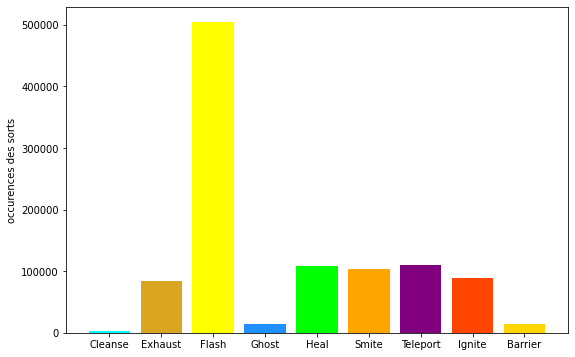

In [ ]:
fig=plt.figure(figsize=(9,6))
plt.bar(Tab_Spell_Total['name'],Tab_Spell_Total['total'],color=['cyan','goldenrod','yellow','dodgerblue','lime','orange','purple','orangered','gold'])
plt.yticks(color='black')
plt.xticks(color='black')
plt.ylabel('occurences des sorts', color='black');

In [ ]:
print("nombres de joueurs totals : ")
print(51490*10,"\n")

print("pourcentage d'utilisation du Saut éclair (Flash [EN]) : ")
print((504121/514900)*100,"\n")

print("pourcentage d'utilisation du Châtiment (Smite [EN]) : ")
print((103062/514900)*100,"\n")

print("pourcentage d'utilisation du Soin (Heal [EN]) : ")
print((108043/514900)*100,"\n")

print("pourcentage d'utilisation de la Téléportation (Teleport [EN]) : ")
print((109401/514900)*100,"\n")

print("pourcentage d'utilisation de l'Embrasement (Ignite [EN]) : ")
print((108043/514900)*100,"\n")

print("pourcentage d'utilisation de la Fatigue (Exhaust [EN]) : ")
print((84576/514900)*100,"\n")

print("pourcentage d'utilisation de la Barrière (Barrier [EN]) : ")
print((14880/514900)*100,"\n")

print("pourcentage d'utilisation du Fantôme (Ghost [EN]) : ")
print((14305/514900)*100,"\n")

print("pourcentage d'utilisation de la Purge (Cleanse [EN]) : ")
print((3154/514900)*100,"\n")

nombres de joueurs totals : 
514900 

pourcentage d'utilisation du Saut éclair (Flash [EN]) : 
97.90658380268013 

pourcentage d'utilisation du Châtiment (Smite [EN]) : 
20.015925422412117 

pourcentage d'utilisation du Soin (Heal [EN]) : 
20.98329772771412 

pourcentage d'utilisation de la Téléportation (Teleport [EN]) : 
21.247038259856282 

pourcentage d'utilisation de l'Embrasement (Ignite [EN]) : 
20.98329772771412 

pourcentage d'utilisation de la Fatigue (Exhaust [EN]) : 
16.42571373082152 

pourcentage d'utilisation de la Barrière (Barrier [EN]) : 
2.8898815303942516 

pourcentage d'utilisation du Fantôme (Ghost [EN]) : 
2.778209361040979 

pourcentage d'utilisation de la Purge (Cleanse [EN]) : 
0.6125461254612546 



**Analyse :**

Le ***Flash*** (Saut éclair [FR]) est utilisé par presque 98% des joueurs à chaque partie. On peut très clairement en déduire que ce sortilège est considéré comme indispensable de la part de tous les joueurs.

Ce résultat n'est pas très étonnant lorsque l'on a déjà joué au jeu. En effet, le *Flash* offre un pouvoir extrêmement utile dans beaucoup de situations. (Traverser des murs, fuir un adversaire, poursuivre un adversaire, se repositionner en plein combat, ...)

Le ***Smite*** (Châtiment [FR]) est utilisé par 20.02 % des joueurs à chaque partie. 

Ce résultat est tout à fait logique. Le *Smite* est utile aux joueurs évoluant dans la jungle (ou forêt) de la carte. Comme chaque équipe est composée de 5 joueurs et que l'un d'eux occupe le poste de "Jungler", il est normal d'obtenir un résultat de 20%.

Même constats pour le ***Heal*** (Soin [FR]), le ***Teleport*** (Téléportation [FR]) ou l'***Ignite*** (Embrasement [FR]), utilisés par près de 21 % des joueurs. Ces sortilèges sont beaucoup utilisés à des postes spécifiques. La téléportation est généralement utilisée par les joueurs évoluant sur la ***Toplane*** (voie du haut [FR]) tandis que le soin est majoritairement utilisé par les joueurs évoluant sur la ***Botlane*** (voie du bas [FR]) en tant qu'***ADC*** (Attack Damage Carry). En ce qui concerne l'embrasement, il est généralement utilisé sur la ***Midlane*** (voie du milieu [FR]).

Le sortilège ***Exhaust*** (Fatigue [FR]) utilisé par 16% des joueurs est beaucoup apprécié par les joueurs évoluant sur la ***Botlane*** en tant que ***Support***. Il leur arrive également de jouer le sortilège ***Ignite***.

Le reste des sortilèges (***Barrier*** (Barrière [FR]), ***Ghost*** (Fantôme [FR]), ***Cleanse*** (Purge [FR]) sont très situationnels, ce qui explique leur faible taux d'utilisation.

# Les Champions

![Texte alternatif…](https://static1.millenium.org/articles/1/90/29/1/@/2439-lol-article_m-22.jpg)


Affichons les deux tableaux contenant des informations sur les champions du jeu.

In [ ]:
tab_info_ch_1 = pd.read_json((ch_info1['data']).to_json(), orient='index')
tab_info_ch_2 = pd.read_json((ch_info2['data']).to_json(), orient='index')
tab_info_ch_1

,title,id,key,name
1,the Dark Child,1,Annie,Annie
10,The Judicator,10,Kayle,Kayle
101,the Magus Ascendant,101,Xerath,Xerath
102,the Half-Dragon,102,Shyvana,Shyvana
103,the Nine-Tailed Fox,103,Ahri,Ahri
...,...,...,...,...
91,the Blade's Shadow,91,Talon,Talon
92,the Exile,92,Riven,Riven
96,the Mouth of the Abyss,96,KogMaw,Kog'Maw
98,the Eye of Twilight,98,Shen,Shen


In [ ]:
tab_info_ch_2

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu
...,...,...,...,...,...
Zac,"[Tank, Fighter]",the Secret Weapon,154,Zac,Zac
Zed,"[Assassin, Fighter]",the Master of Shadows,238,Zed,Zed
Ziggs,[Mage],the Hexplosives Expert,115,Ziggs,Ziggs
Zilean,"[Support, Mage]",the Chronokeeper,26,Zilean,Zilean


On va s'intéresser au deuxième tableau qui est plus complet que le premier. De la même manière que pour les sortilèges d'invocateurs, on va compter le nombre d'occurences de chaque champion et de chaque type de champion (tags). Il y a 139 champions différents comme nous l'indique le nombre de lignes. Il y a 6 catégories de champion, un champion pouvant être dans plusieurs catégories.

In [ ]:
""" On récupère la dataframe 2 des champions """
Champion_Info = pd.read_json((ch_info2['data']).to_json(), orient='index')

Champion_Info.set_index(['id'], inplace=True)

""" On affiche les informations qui nous intéressent. """
Champion_Info.loc[:,['name','tags']]

,name,tags
id,,
266,Aatrox,"[Fighter, Tank]"
103,Ahri,"[Mage, Assassin]"
84,Akali,[Assassin]
12,Alistar,"[Tank, Support]"
32,Amumu,"[Tank, Mage]"
...,...,...
154,Zac,"[Tank, Fighter]"
238,Zed,"[Assassin, Fighter]"
115,Ziggs,[Mage]


In [ ]:
""" On récupère les 10 colonnes de notre dataframe indiquant les champions
    choisi par les joueurs. """
Champion_Col_Df = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
                   't2_champ1id','t2_champ2id','t2_champ3id','t2_champ5id','t2_champ5id']

""" On créé un tableau comptant le nombre de fois où chaque champion apparaît dans toutes les parties. """
Tab_Champ_Total = df[Champion_Col_Df].apply(pd.value_counts)

""" On ajoute une colonne comptant le nombre total de fois où chaque champion à été joué. """
Tab_Champ_Total['total'] = Tab_Champ_Total[Champion_Col_Df].sum(axis=1)

""" On ajoute une colonne pour voir les noms """
Tab_Champ_Total['name'] = Champion_Info['name']
Col_Names = Tab_Champ_Total.columns.tolist()
Col_Names = Col_Names[-1:] + Col_Names[:-1]
Tab_Champ_Total = Tab_Champ_Total[Col_Names]

Tab_Champ_Total

,name,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ5id,t2_champ5id,t2_champ5id,t2_champ5id,total
1,Annie,320,350,313,347,297,326,329,309,337,337,337,337,3939
2,Olaf,175,155,152,137,169,141,169,144,162,162,162,162,1890
3,Galio,311,280,265,278,274,255,253,267,254,254,254,254,3199
4,Twisted Fate,356,358,343,316,398,368,347,373,384,384,384,384,4395
5,Xin Zhao,339,324,348,316,342,353,300,296,314,314,314,314,3874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,Kalista,321,366,357,380,349,360,361,377,318,318,318,318,4143
432,Bard,360,350,351,392,396,355,391,356,390,390,390,390,4511
497,Rakan,618,709,698,725,610,675,696,717,657,657,657,657,8076
498,Xayah,672,814,780,808,681,754,829,812,793,793,793,793,9322


**Petite explication du tableau :**  Dans la phase de sélection et banissement des champions qui précède la partie, tous les joueurs sont placés dans un ordre aléatoire. Les joueurs choisissent leurs champions chacun leur tour après la phase de bannissement. Voilà pourquoi on peut remarquer dans le tableau que chaque champion est choisit environ le même nombre de fois dans chaque colonne. Ci-dessous, une image de la phase de sélection des champions.

![Texte alternatif…](https://mobalytics.gg/wp-content/uploads/2018/11/Troll-champ-select.jpg)

Affichons un histogramme montrant le nombre de fois qu'un champion a été joué dans toutes les parties de notre dataframe :

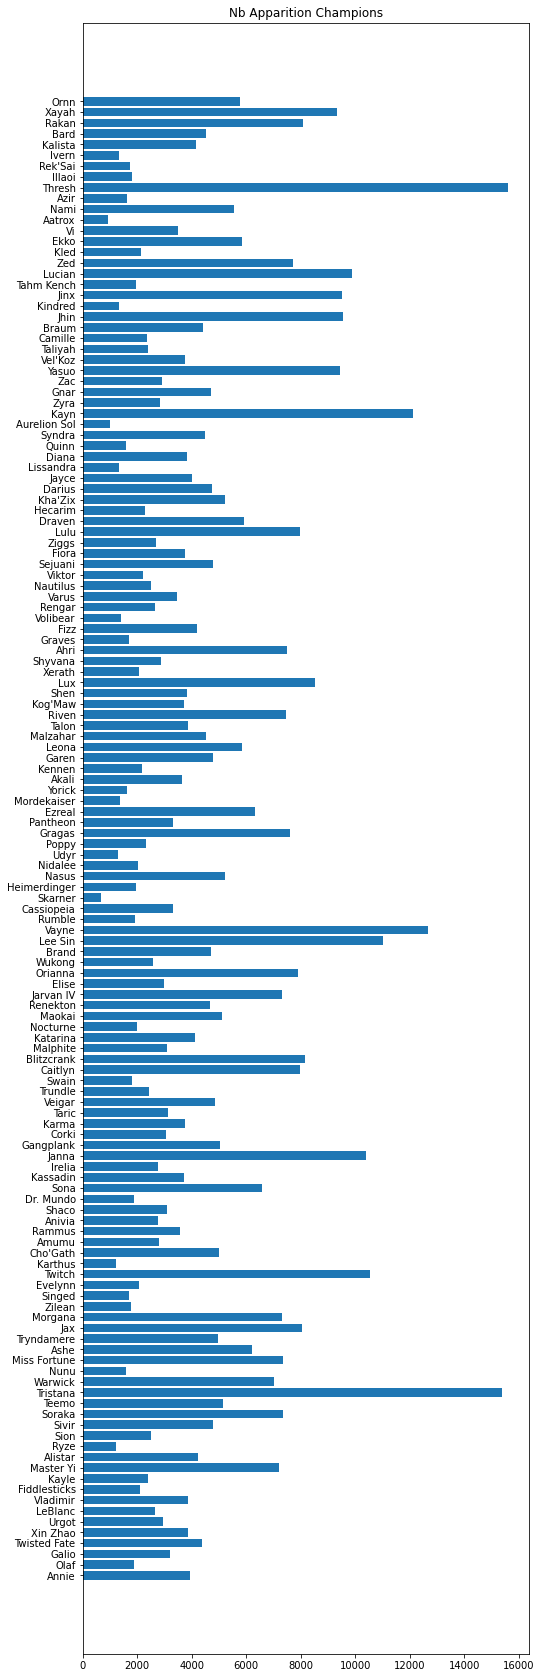

In [ ]:
fig=plt.figure(figsize=(8,30))
plt.barh(Tab_Champ_Total['name'],Tab_Champ_Total['total'])
plt.title('Nb Apparition Champions');

Même chose maintenant pour le nombre de bannissements de chaque champion :

In [ ]:
""" On récupère les 10 colonnes de notre dataframe indiquant les champions
    banni par les joueurs. """
ChampBan_Col_Df = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
                   't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']

""" On créé un tableau comptant le nombre de fois où chaque champion apparaît dans toutes les parties. """
Tab_ChampBan_Total = df[ChampBan_Col_Df].apply(pd.value_counts)

""" On ajoute une colonne comptant le nombre total de fois où chaque champion à été banni. """
Tab_ChampBan_Total['total'] = Tab_ChampBan_Total[ChampBan_Col_Df].sum(axis=1)

""" On ajoute une colonne pour voir les noms """
Tab_ChampBan_Total['name'] = Champion_Info['name']
Col_Names = Tab_ChampBan_Total.columns.tolist()
Col_Names = Col_Names[-1:] + Col_Names[:-1]
Tab_ChampBan_Total = Tab_ChampBan_Total[Col_Names]

Tab_ChampBan_Total

,name,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,total
-1,None,360,401,390,416,347,413,403,380,349,407,3866
1,Annie,208,217,190,223,240,200,199,208,202,221,2108
2,Olaf,41,31,42,37,37,28,46,39,37,39,377
3,Galio,197,203,209,201,206,207,230,180,224,215,2072
4,Twisted Fate,31,23,37,28,22,22,25,38,27,31,284
...,...,...,...,...,...,...,...,...,...,...,...,...
429,Kalista,102,93,104,79,86,81,96,83,90,86,900
432,Bard,52,53,49,40,55,47,50,48,70,65,529
497,Rakan,226,192,202,227,197,209,236,229,224,215,2157
498,Xayah,591,658,636,626,633,619,636,603,658,614,6274


Text(0.5, 1.0, 'Nb Bans Champions')

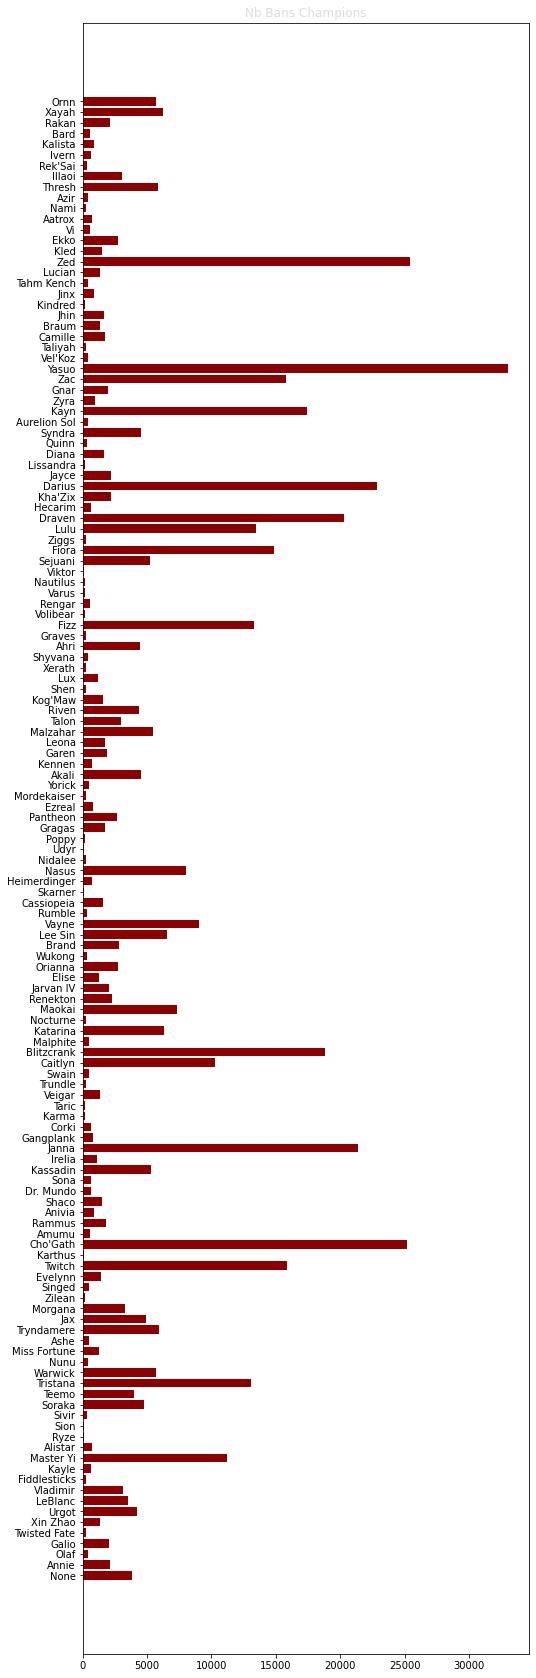

In [ ]:
fig=plt.figure(figsize=(8,30))
plt.barh(Tab_ChampBan_Total['name'],Tab_ChampBan_Total['total'],color='darkred')
plt.title('Nb Bans Champions',color='gainsboro')

# Objectifs

### Définitions

*   **Tourelle** : Bâtiment défensif qui attaque les ennemis proches. Elle attaque en priorité les sbires puis les champions. Cependant, si un champion ennemi attaque un champion allié à la tourelle, la tourelle prend pour cible le champion ennemi tant qu'il est à portée de tir.

![Texte alternatif…](https://drive.google.com/uc?export=view&id=1ZAoeFx6xdEl5FffFO1Aoqp4nq4Oy6Bdt)

*   **Inhibiteur** : Bâtiment innofensif qui une fois détruit permet la génération de super sbire pendant 5 minutes sur la voie associée. Quand les 5 minutes sont écoulées, le batiment est reconstruit.

![](https://drive.google.com/uc?export=view&id=1LR3WRmHZqe8HDhuYtIUl5_4s0rxCkj-m)

*   **Dragon** : Un dragon est un objectif neutre qui apporte un avantage à l'équipe qui le vainc. Il y a 4 dragons différents (Feu, Terre, Eau et Air) apportant chacun des avantages différents. Un dragon apparait toutes les 5 minutes et reste dans son enclos jusqu'à être tué.

![Texte alternatif…](https://drive.google.com/uc?export=view&id=1M16nE1It5OaK3LRWQ4Zrvv-DsBuLbb_M)

*   **Héraut de la Faille** : Objectif neutre qui précède le baron nashor (il se situe dans le même enclos). C'est un monstre qui s'il est tué pourra êêtre invoqué par un joueur afin d'assiéger et d'infliger d'importants dégâts aux tourelles adverses.

![Texte alternatif…](https://drive.google.com/uc?export=view&id=1MRYq-vP2mEFcpEKH5IGmX1PlGPuJShKw)

*   **Baron Nashor** : Le baron nashor est également un objectif neutre qui apparaît à partir de 20 minutes de jeu. C'est un monstre très difficile à tuer qui donne une aura à tous les joueurs de l'équipe qui le vainc. Cette aura renforce les sbires à proximité ce qui permet d'assiéger la base adverse beaucoup plus facilement (+ d'autres avantages mineurs).

![Texte alternatif…](https://drive.google.com/uc?export=view&id=1mmXI0CIU4AD5_B37EvQLPZ5hPICUMqRE)





### Analyse statistique des objectifs

Faisons une petite étude statistique des objectifs pour observer la différence d'objectifs accomplis entre l'équipe gagnante et l'équipe perdante. Cela nous permettra une meilleure analyse et compréhension des corrélations par la suite.

##### Nombre d'objectifs

Dans cette partie, nous allons étudier le nombre d'objectifs détruits par partie.

In [ ]:
""" On trie la dataframe pour enlever les remakes. """
games = df.loc[df["gameDuration"]>240]

""" On va récupérer tous les résultats des objectifs détruits en fonction de la victoire ou de la défaite. """
t1_win = games.loc[games["winner"]==1]
t2_win = games.loc[games["winner"]==2]
t1_win_kills = t1_win[['t1_towerKills','t1_inhibitorKills','t1_dragonKills','t1_baronKills','t1_riftHeraldKills']]
t1_lose_kills = t2_win[['t1_towerKills','t1_inhibitorKills','t1_dragonKills','t1_baronKills','t1_riftHeraldKills']]
t2_win_kills = t2_win[['t2_towerKills','t2_inhibitorKills','t2_dragonKills','t2_baronKills','t2_riftHeraldKills']]
t2_lose_kills = t1_win[['t2_towerKills','t2_inhibitorKills','t2_dragonKills','t2_baronKills','t2_riftHeraldKills']]

""" On réunit toutes les statistiques des équipes victorieuses. """
t1_win_kills.columns = ['win_towerKills','win_inhibitorKills','win_dragonKills','win_baronKills','win_riftHeraldKills']
t2_win_kills.columns = ['win_towerKills','win_inhibitorKills','win_dragonKills','win_baronKills','win_riftHeraldKills']
win_kills = pd.concat([t1_win_kills, t2_win_kills])

""" On réunit toutes les statistiques des équipes perdantes. """
t1_lose_kills.columns = ['lose_towerKills','lose_inhibitorKills','lose_dragonKills','lose_baronKills','lose_riftHeraldKills']
t2_lose_kills.columns = ['lose_towerKills','lose_inhibitorKills','lose_dragonKills','lose_baronKills','lose_riftHeraldKills']
lose_kills = pd.concat([t1_lose_kills, t2_lose_kills])

print("Moyenne des objectifs détruits en fonction de la victoire/défaite :\n")
average_win_kills = win_kills.mean()
average_lose_kills = lose_kills.mean()
print(average_win_kills,"\n")
print(average_lose_kills)

Moyenne des objectifs détruits en fonction de la victoire/défaite :

win_towerKills         8.812486
win_inhibitorKills     1.870106
win_dragonKills        2.032289
win_baronKills         0.638334
win_riftHeraldKills    0.349558
dtype: float64 

lose_towerKills         2.703609
lose_inhibitorKills     0.180097
lose_dragonKills        0.825569
lose_baronKills         0.167194
lose_riftHeraldKills    0.153693
dtype: float64


Ci-dessus, ce sont les moyennes des objectifs détruits de toutes les équipes gagnantes et de toutes les équipes perdantes.

*   En moyenne, l'équipe victorieuse a détruit 8,8 tourelles contre 2,7 pour l'équipe perdante.
*   En moyenne, l'équipe victorieuse a détruit 1,9 inhibiteurs contre 0.2 pour l'équipe perdante.
*   En moyenne, l'équipe victorieuse a tué 2 dragons contre 0.8 pour l'équipe perdante.
*   En moyenne, l'équipe victorieuse a tué 0.64 barons contre 0.17 pour l'équipe perdante.
*   En moyenne, l'équipe victorieuse a tué 0.35 hérauts contre 0.15 pour l'équipe perdante.



Affichons graphiquement les résultats :

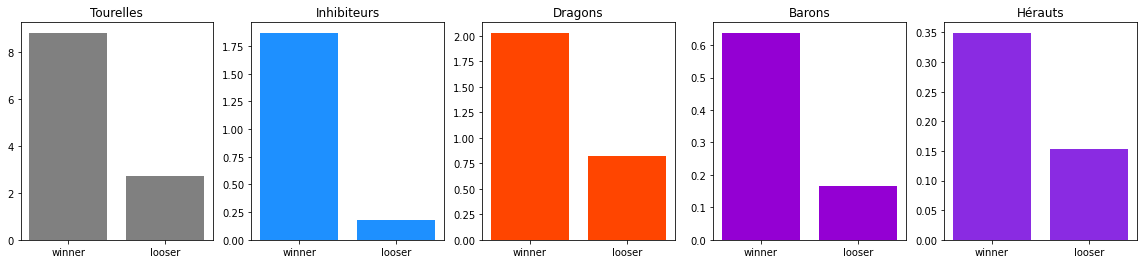

In [ ]:
fig,axs = plt.subplots(1,5,figsize=(20,4))
fig.subplots_adjust(hspace=0.4)

axs[0].set_title("Tourelles")
axs[0].bar(['winner','looser'],[average_win_kills[0],average_lose_kills[0]],color = ['grey','grey'])

axs[1].set_title("Inhibiteurs")
axs[1].bar(['winner','looser'],[average_win_kills[1],average_lose_kills[1]],color = ['dodgerblue','dodgerblue'])

axs[2].set_title("Dragons")
axs[2].bar(['winner','looser'],[average_win_kills[2],average_lose_kills[2]],color = ['orangered','orangered'])

axs[3].set_title("Barons")
axs[3].bar(['winner','looser'],[average_win_kills[3],average_lose_kills[3]],color = ['darkviolet','darkviolet'])

axs[4].set_title("Hérauts")
axs[4].bar(['winner','looser'],[average_win_kills[4],average_lose_kills[4]],color = ['blueviolet','blueviolet']);

Affichons les rapports entre les objectifs accomplis de l'équipe gagnante et de l'équipe perdante :

In [ ]:
print("Rapport Tourelles Victoire/Défaite :",average_win_kills[0]/average_lose_kills[0],'\n')
print("Rapport Inhibiteurs Victoire/Défaite :",average_win_kills[1]/average_lose_kills[1],'\n')
print("Rapport Dragons Victoire/Défaite :",average_win_kills[2]/average_lose_kills[2],'\n')
print("Rapport Barons Victoire/Défaite :",average_win_kills[3]/average_lose_kills[3],'\n')
print("Rapport Hérauts Victoire/Défaite :",average_win_kills[4]/average_lose_kills[4])

Rapport Tourelles Victoire/Défaite : 3.2595272764711942 

Rapport Inhibiteurs Victoire/Défaite : 10.383859571649369 

Rapport Dragons Victoire/Défaite : 2.461682963248398 

Rapport Barons Victoire/Défaite : 3.817933166845047 

Rapport Hérauts Victoire/Défaite : 2.274385510996119


**Analyse de nos résultats :**


*   En moyenne, l'équipe victorieuse détruit 3 fois plus de tourelles que l'équipe perdante.
*   Il est très rare que l'équipe perdante détruise un inhibiteur au cours de la partie.
*   Les Dragons sont plus partagés au cours d'une partie. Il n'est pas rare que chaque équipe ait réussit à tuer au moins un dragon.
*   Le baron nashor (objectif de fin de partie) permet bien souvent de débloquer la victoire. Néanmois beaucoup de parties se terminent avant qu'aucune des 2 équipes n'ait tué un baron nashor.
*   Le héraut de la faille est un objectif moins décisif et plus rarement tué par les joueurs.
 
 Ces résultats nous permettent de nuancer les corrélations obtenues dans la partie suivante. Nous verrons que le nombre de dragon tués est plus corrélé à la victoire que le nombre de baron tués. Cependant, cela ne veut pas dire que les dragons sont des objectifs plus importants que les barons afin d'obtenir la victoire de son équipe.







##### Premiers objectifs

Dans cette partie, nous allons étudions les premiers objectifs des parties.

In [ ]:
""" variables pour extraire les colonnes """
first_blood = ['firstBlood']
first_tower = ['firstTower']
first_inhib = ['firstInhibitor']
first_dragon = ['firstDragon']
first_baron = ['firstBaron']
first_herald = ['firstRiftHerald']

""" on compte les premiers objectifs selon quel équipe gagne """
first_blood_where_t1_win = t1_win[first_blood].apply(pd.value_counts)
first_blood_where_t2_win = t2_win[first_blood].apply(pd.value_counts)
first_tower_where_t1_win = t1_win[first_tower].apply(pd.value_counts)
first_tower_where_t2_win = t2_win[first_tower].apply(pd.value_counts)
first_inhib_where_t1_win = t1_win[first_inhib].apply(pd.value_counts)
first_inhib_where_t2_win = t2_win[first_inhib].apply(pd.value_counts)
first_dragon_where_t1_win = t1_win[first_dragon].apply(pd.value_counts)
first_dragon_where_t2_win = t2_win[first_dragon].apply(pd.value_counts)
first_baron_where_t1_win = t1_win[first_baron].apply(pd.value_counts)
first_baron_where_t2_win = t2_win[first_baron].apply(pd.value_counts)
first_herald_where_t1_win = t1_win[first_herald].apply(pd.value_counts)
first_herald_where_t2_win = t2_win[first_herald].apply(pd.value_counts)

""" on ajoute les premiers objectifs de l'équipe 1 et 2 gagnantes ensemble, et ceux de l'équipe 1 et 2 perdantes ensemble. """
first_blood_winner = first_blood_where_t1_win.loc[1]['firstBlood'] + first_blood_where_t2_win.loc[2]['firstBlood']
first_blood_looser = first_blood_where_t1_win.loc[2]['firstBlood'] + first_blood_where_t2_win.loc[1]['firstBlood']
first_tower_winner = first_tower_where_t1_win.loc[1]['firstTower'] + first_tower_where_t2_win.loc[2]['firstTower']
first_tower_looser = first_tower_where_t1_win.loc[2]['firstTower'] + first_tower_where_t2_win.loc[1]['firstTower']
first_inhib_winner = first_inhib_where_t1_win.loc[1]['firstInhibitor'] + first_inhib_where_t2_win.loc[2]['firstInhibitor']
first_inhib_looser = first_inhib_where_t1_win.loc[2]['firstInhibitor'] + first_inhib_where_t2_win.loc[1]['firstInhibitor']
first_dragon_winner = first_dragon_where_t1_win.loc[1]['firstDragon'] + first_dragon_where_t2_win.loc[2]['firstDragon']
first_dragon_looser = first_dragon_where_t1_win.loc[2]['firstDragon'] + first_dragon_where_t2_win.loc[1]['firstDragon']
first_baron_winner = first_baron_where_t1_win.loc[1]['firstBaron'] + first_baron_where_t2_win.loc[2]['firstBaron']
first_baron_looser = first_baron_where_t1_win.loc[2]['firstBaron'] + first_baron_where_t2_win.loc[1]['firstBaron']
first_herald_winner = first_herald_where_t1_win.loc[1]['firstRiftHerald'] + first_herald_where_t2_win.loc[2]['firstRiftHerald']
first_herald_looser = first_herald_where_t1_win.loc[2]['firstRiftHerald'] + first_herald_where_t2_win.loc[1]['firstRiftHerald']

first_tower_none = first_tower_where_t1_win.loc[0]['firstTower'] + first_tower_where_t2_win.loc[0]['firstTower']
first_inhib_none = first_inhib_where_t1_win.loc[0]['firstInhibitor'] + first_inhib_where_t2_win.loc[0]['firstInhibitor']
first_dragon_none = first_dragon_where_t1_win.loc[0]['firstDragon'] + first_dragon_where_t2_win.loc[0]['firstDragon']
first_baron_none = first_baron_where_t1_win.loc[0]['firstBaron'] + first_baron_where_t2_win.loc[0]['firstBaron']
first_herald_none = first_herald_where_t1_win.loc[0]['firstRiftHerald'] + first_herald_where_t2_win.loc[0]['firstRiftHerald']

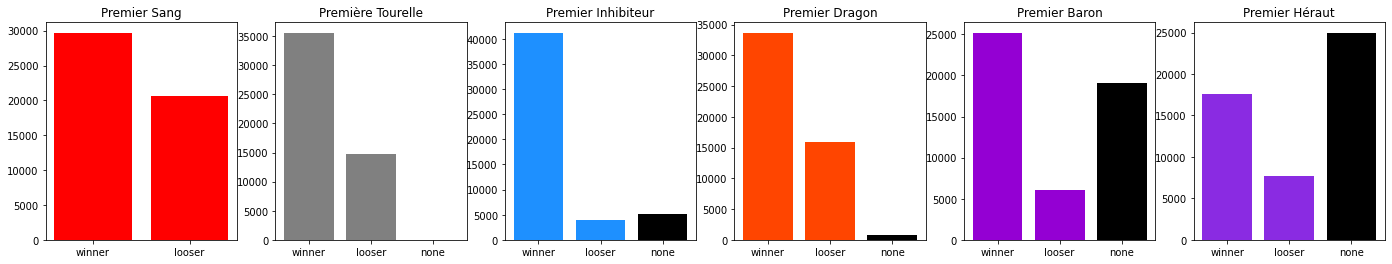

In [ ]:
fig,axs = plt.subplots(1,6,figsize=(24,4))
fig.subplots_adjust(hspace=0.4)

axs[0].set_title("Premier Sang")
axs[0].bar(['winner','looser'],[first_blood_winner,first_blood_looser],color = ['red','red'])

axs[1].set_title("Première Tourelle")
axs[1].bar(['winner','looser','none'],[first_tower_winner,first_tower_looser,first_tower_none],color = ['grey','grey','black'])

axs[2].set_title("Premier Inhibiteur")
axs[2].bar(['winner','looser','none'],[first_inhib_winner,first_inhib_looser,first_inhib_none],color = ['dodgerblue','dodgerblue','black'])

axs[3].set_title("Premier Dragon")
axs[3].bar(['winner','looser','none'],[first_dragon_winner,first_dragon_looser,first_dragon_none],color = ['orangered','orangered','black'])

axs[4].set_title("Premier Baron")
axs[4].bar(['winner','looser','none'],[first_baron_winner,first_baron_looser,first_baron_none],color = ['darkviolet','darkviolet','black']);

axs[5].set_title("Premier Héraut")
axs[5].bar(['winner','looser','none'],[first_herald_winner,first_herald_looser,first_herald_none],color = ['blueviolet','blueviolet','black']);

In [ ]:
nb_total = 51490
print("Pourcentage Premier Sang : \n ","winner : ",(first_blood_winner/nb_total)*100,"%    looser : ",(first_blood_looser/nb_total)*100,"% \n")
print("Pourcentage Première Tourelle : \n ","winner : ",(first_tower_winner/nb_total)*100,"%    looser : ",(first_tower_looser/nb_total)*100,"%     none : ",(first_tower_none/nb_total)*100,"%\n")
print("Pourcentage Premier Inhibiteur : \n ","winner : ",(first_inhib_winner/nb_total)*100,"%    looser : ",(first_inhib_looser/nb_total)*100,"%     none : ",(first_inhib_none/nb_total)*100,"%\n")
print("Pourcentage Premier Dragon : \n ","winner : ",(first_dragon_winner/nb_total)*100,"%    looser : ",(first_dragon_looser/nb_total)*100,"%     none : ",(first_dragon_none/nb_total)*100,"%\n")
print("Pourcentage Premier Baron : \n ","winner : ",(first_baron_winner/nb_total)*100,"%    looser : ",(first_baron_looser/nb_total)*100,"%     none : ",(first_baron_none/nb_total)*100,"%\n")
print("Pourcentage Premier Héraut : \n ","winner : ",(first_herald_winner/nb_total)*100,"%    looser : ",(first_herald_looser/nb_total)*100,"%     none : ",(first_herald_none/nb_total)*100,"%\n")

Pourcentage Premier Sang : 
  winner :  57.68692950087395 %    looser :  39.99223150126238 % 

Pourcentage Première Tourelle : 
  winner :  69.15323363759953 %    looser :  28.490969120217517 %     none :  0.0349582443192853 %

Pourcentage Premier Inhibiteur : 
  winner :  79.9980578753156 %    looser :  7.813167605360265 %     none :  9.867935521460478 %

Pourcentage Premier Dragon : 
  winner :  65.38939599922315 %    looser :  30.724412507282967 %     none :  1.5653524956302196 %

Pourcentage Premier Baron : 
  winner :  48.9357156729462 %    looser :  11.720722470382599 %     none :  37.02272285880753 %

Pourcentage Premier Héraut : 
  winner :  34.14449407651971 %    looser :  15.01262381044863 %     none :  48.522043115167996 %



**Observations :**

*   L'équipe victorieuse détruit la première tourelle 70% du temps. C'est un très bon indicateur à prendre en compte pour un joueur. C'est assez révélateur de l'importance de détruire les tourelles dans le jeu et d'être en avance par rapport à son adversaire sur ces objectifs.
*   L'équipe gagnante détruit le premier inhibiteur 80% du temps. Ce n'est pas surprenant quand l'on sait que c'est un prérequis à la victoire. Quand une équipe détruit le premier inhibiteur de la partie, elle est en très bonne voie pour remporter la partie. Dans presque 10% des parties, aucun inhibiteur n'a été détruit. Une des deux équipes a abandonnée par réddition.
*   Au moins un dragon est tué dans presque toutes les parties. L'équipe gagnante tue le premier dragon 65% du temps.
*   Le baron nashor étant un objectif de fin de partie, ce n'est pas étonnant qu'il ne soit jamais fait dans 37% des parties. L'équipe gagnante récupère le premier baron 5 fois sur 6 lorsqu'il est fait !
*   Le héraut de la faille n'est jamais tué dans presque 50% des parties ! C'est loin d'être un objectif majeur qui intéresse grandement les joueurs. Cependant, je me dois de vous rappeler que le héraut de la faille disparaît de la carte à 20 minutes de jeu pour laisser sa place au baron nashor.
 





# Corrélations

Comme expliqué précédement, nous allons enlever les parties qui n'ont pas été réellement perdues ou gagnées (*remakes*) pour l'analyse des corrélations et la création de data-modèles pour prédire la victoire.

Tableau des corrélations entre la victoire et les premiers objectifs :

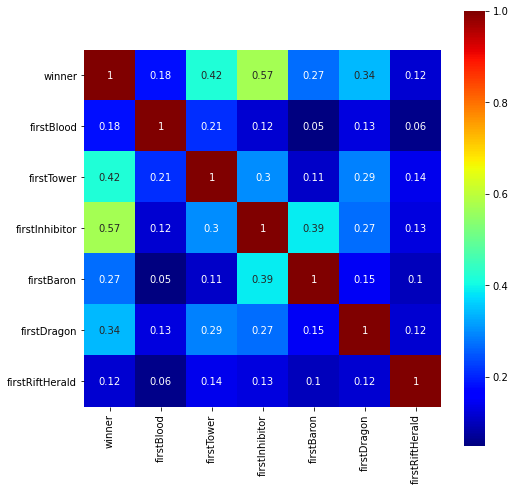

In [ ]:
games = df.loc[df["gameDuration"]>240]
corr = games[['winner','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']].corr()
fig = plt.figure(figsize=(8,8))
sb.heatmap(np.round(corr,2), annot=True,square=True,cmap="jet");

**Analyse des corrélations :**  



*   Premier Sang (firstBlood [EN]) : **0.18** (très faible corrélation)
*   Première tourelle (firstTower [EN]) : **0.42** (corrélation moyenne)
*   Premier inhibiteur (firstinhibitor [EN]) : **0.57** (corrélation moyenne +)
*   Premier Baron (firstBaron [EN]) : **0.27** (corrélation faible)
*   Premier Dragon (firstDragon [EN]) : **0.34** (corralation faible)
*   Premier Héraut de la Faille (firstRiftHerald [EN]) : **0.12** (corrélation très faible)



Une petite explication ici est importante : les premiers objectifs n'ont pas l'air d'impacter très fortemant la partie au vue des résultats mais détrompez-vous. Si le premier Baron a une corrélation faible par exemple, c'est parce que c'est un objectif de fin de partie ! Le Baron Nashor apparaît à partir de 20 minutes de jeu et il faut généralement encore attendre un peu pour être en capacité de le vaincre !
Je rappelle qu'il y a beaucoup de parties qui sont gagnées par abandon de l'équipe adverse.
Prenons un exemple : si l'équipe 1 a déjà détruit 6 tourelles quand l'équipe 2 n'en a toujours pas détruit une seule, il est probable de voir l'équipe 2 abandonner par réddition. Néanmois on peut être quasi certain que l'équipe 1 aurait pris le premier inhibiteur par exemple.

On ne peut pas créer de data modèle solide seulement à partir des premiers objectifs. Il ne sont pas très révélateurs en ce qui concerne la domination d'une équipe bien qu'ils donnent un avantage certain.

Tableau des corrélations entre la victoire et le nombre d'objectifs ou de bâtiments détruits :

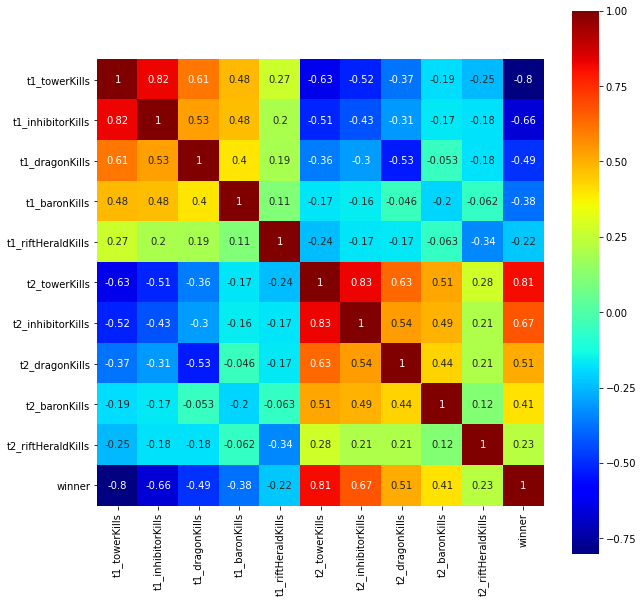

In [ ]:
fig = plt.figure(figsize=(10,10))
sb.heatmap(games[['t1_towerKills','t1_inhibitorKills','t1_dragonKills','t1_baronKills','t1_riftHeraldKills',
                  't2_towerKills','t2_inhibitorKills','t2_dragonKills','t2_baronKills','t2_riftHeraldKills','winner']].corr(),annot=True,square=True,cmap="jet");

**Analyse des corrélations :**  

En ayant au préalable enlevé les fausses victoires (remakes) on obtient des résultats un peu plus précis.

*   Nombre de tourelles détruites (towerKills [EN]) : environ **0.805** (0.8 t1 et 0.81 t2)
*   Nombre d'inhibiteurs détruits (inhibitorKills [EN]) : environ **0.665** (0.65 t1 et 0.66 t2)
*   Nombre de dragons tués (dragonKills [EN]) : environ **0.5** (0.49 t1 et 0.51 t2)
*   Nombre de barons tués (baronKills [EN]) : environ **0.395** (0.38 t1 et 0.41 t2)
*   Nombre de héraut de la faille tués (riftHeraldKills [EN]) : envrion **0.225** (0.22 t1 et 0.23 t2)




En prenant en compte les résultats obtenus, nous allons entraîner nos futurs modèles pour prédire la victoire d'une équipe grâce aux paramètres du nombre de tourelles détruites et du nombre d'inhibiteurs détruits. Nous verrons ensuite si l'ajout du nombre de dragons tués ou encore le nombre de barons tués, permet d'améliorer notre modèle.

Grâce à mon expérience sur le jeu, je suis sûr que je ne dois pas seulement utiliser comme paramètre "le nombre de tourelles détruites" mais bien "le nombre de tourelles détruites" + "le nombre d'inhibiteurs détruits". Si une équipe veut gagner une partie, elle sera obligée de détruire au moins 5 tourelles et 1 inhibiteur. 

Voici un scénario envisageable :

*   Équipe 1 : [9 tourelles détruites, 0 inhibiteur détruit]
*   Équipe 2 : [5 tourelles détruites, 1 inhibiteur détruit]

L'équipe 2 a alors gagné malgré que le nombre de tourelles qu'elle a détruites soit très inférieur à celle de l'équipe 1.

On pourrait alors se dire que si une équipe n'a détruit aucun inhibiteur, elle a forcément perdu. Néanmois ce serait oublier que beaucoup de parties sont gagnées alors qu'aucune équipe n'a détruit d'inhibiteur. Et cela à cause de la réddition ! Si la réddition n'existait pas sur le jeu, on pourrait traiter beaucoup de parties très facilement. Malheureusement ce n'est pas le cas.

Néanmois ces deux paramètres regroupés restent d'excellents indicateurs pour savoir si une équipe a gagné ou perdu et l'analyse des corrélations nous le confirme bien.



# Modèles de Régression/Classification

Le classification peut être vue comme un cas particulier de régression où les valeurs à prédire sont discrètes. Dans notre étude, on veut prédire la victoire ou la défaite d'une équipe, soit la valeur de la variable "winner" (soit 1 ou 2). Je pense que l'on peut dire que nous sommes dans un cas particulier où l'on fait à la fois de la régression et de la classification.

Notre variable cible est qualitative. La majorité de nos paramètres seront quantitatifs (on regarde le nombre de constructions ou objectifs détruits par une équipe) mais l'on peut aussi essayer de se servir des variables qualitatives de notre dataframe (Quelle équipe à pris la première tourelle, dragon, baron, ...).

### Imports

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Régression Logistique

On va créer un modèle logit (régression logistique). Soit $Y$ la variable aléatoire à prédire qui sera le numéro (1 ou 2) de l'équipe victorieuse et $X = (X_1,X_2, X_3, X_4)$ les variables prédictives qui seront respectivement le nombre de tourelles détruites par l'équipe 1 et 2 et le nombre d'inhibiteurs détruits par l'équipe 1 et 2 :

*   $X_1 = t1\_towerKills$
*   $X_2 = t2\_towerKills$
*   $X_3 = t1\_inhibitorKills$
*   $X_4 = t2\_inhibitorKills$
*   $Y \; \; = winner$

Dans notre modèle logit, un "succès" correspondra à une victoire de l'équipe 1 (et une défaite de l'équipe 2) et un "échec" correspondra à une défaite de l'équipe 1 (et donc une victoire de l'équipe 2) : 

*   $Y = 1$ $\iff$ Équipe 1 gagne.
*   $Y = 2$ $\iff$ Équipe 1 perd.



##### Création de nos échantillons et de notre modèle

In [ ]:
""" Création de nos échantillons pour entrainer notre modèle logit et pour le tester """

nb_total_parties = games.shape[0]
Y = games['winner']
Y = Y.values
X = games[['t1_towerKills','t2_towerKills','t1_inhibitorKills','t2_inhibitorKills']]
X = X.values

X_train_set, X_test_set = train_test_split(X, test_size=0.3, random_state=42, shuffle=True)

Y_train_set, Y_test_set = train_test_split(Y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
""" Création de notre modèle logit """ 
model_logit = LogisticRegression()

##### Étude des hyperparamètres

In [ ]:
#help(LogisticRegression())

Il y a beaucoup de paramètres pour le modèle de régression logistique, certains solveurs ne supportent que certains paramètres. Du fait de mon manque d'expérience, je ne sais pas bien configurer le modèle et donc il est difficile de donner un ensemble de valeurs particulières à tester comme arguments.

In [ ]:
penalty = ["l2"] #'elasticnet',#"l1",
# The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
# The ‘elasticnet’ solver is only supported by the ‘saga’ solver.

#fit_intercept = ["True"]
solver = ["lbfgs"] #"liblinear" #"newton-cg" "sag","saga"
multi_class = ["auto","ovr","multinomial"]

#grid_logisticregression=GridSearchCV(estimator=model_logit,cv=10)

In [ ]:
#grid_logisticregression.fit(X_train_set,Y_train_set);
#print("best score: ", grid_logisticregression.best_score_)
#print("best param: ", grid_logisticregression.best_params_)

##### Test de notre modèle final

In [ ]:
""" Entraînement de notre modèle logit """
model_logit.fit(X_train_set, Y_train_set)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
""" Test de notre modèle logit """
Y_predictions_set = model_logit.predict(X_test_set)
Y_predictions_set

array([2, 2, 1, ..., 1, 1, 2])

In [ ]:
print(classification_report(Y_test_set, Y_predictions_set))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      7660
           2       0.97      0.97      0.97      7429

    accuracy                           0.97     15089
   macro avg       0.97      0.97      0.97     15089
weighted avg       0.97      0.97      0.97     15089



Affichons la matrice de confusion pour évaluer notre modèle. Il est conseillé de construire cette matrice sur un échantillon de test qui n'aura pas participé à la construction du modèle.

In [ ]:
""" Première manière de l'afficher (un peu plus précis) """
confusion_matrix(Y_test_set,Y_predictions_set)

array([[7400,  260],
       [ 209, 7220]])

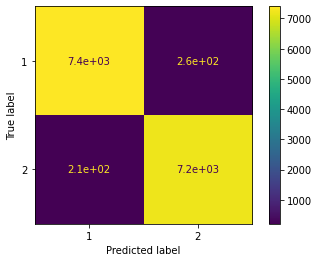

In [ ]:
""" Deuxième manière de l'afficher (un peu plus joli) """
plot_confusion_matrix(model_logit, X_test_set, Y_test_set);

In [ ]:
""" Pourcentage de bonnes prédictions """
print((14620/15089)*100)

96.89177546557094


**Analyse :**

*   Sur les 15089 parties, notre modèle a prédit 14620 bons résultats et 469 mauvais résultats, soit un taux de 96,89% de bons résultats.
*   Sur les 7660 victoires de l'équipe 1 prédits, 7400 sont correctes (vrais positifs) et 260 sont fausses (faux négatifs).
*   Sur les 7429 défaites de l'équipe 1 prédits, 7220 sont correctes (vrais négatifs) et 209 sont fausses (faux positifs).



##### Amélioration 

On va tester d'autres modèles en ajoutant le nombre de dragons, de barons ou encore d'hérauts tués. On observe de très légères variations par rapport à nos précédents résultats qui sont négligeables. 

On observe néanmoins quelque chose d'intrigant : 
Quand on ajoute le nombre de dragons tués par chaque équipe, obtient des résultats moins bons.
Quand on ajoute le nombre de baron tués par chaque équipe, on obtient des résultats meilleurs.
C'est étonnant quand l'on sait que le nombre de dragons tués est plus corrélé à la victoire (0.5) que le nombre de baron tué (0.395). 

Une explication est que le Baron Nashor est un objectif de fin de partie qui a beaucoup plus d'impact qu'un dragon. Comme c'est un objectif de fin de partie, il y a beaucoup plus de dragons tués dans une partie que de baron nashor. Cependant, quand une équipe tue un baron nashor, elle obtient un avantage considérable qui permet généralement de détruire avec beaucoup plus de facilité les dernières défenses adverses.

Pour plus de compréhension, n'hésitez pas à revoir la partie "analyse statistique des objectifs".

In [ ]:
""" 2ème VERSION : AJOUT DES DRAGONKILLS"""

""" Création de nos échantillons pour entrainer notre modèle logit et pour le tester """

nb_total_parties = games.shape[0]
Y = games['winner']
Y = Y.values
X = games[['t1_towerKills','t2_towerKills','t1_inhibitorKills','t2_inhibitorKills','t1_dragonKills','t2_dragonKills']]
X = X.values

X_train_set, X_test_set = train_test_split(X, test_size=0.3, random_state=42, shuffle=True)

Y_train_set, Y_test_set = train_test_split(Y, test_size=0.3, random_state=42, shuffle=True)

model_logit2 = LogisticRegression()

model_logit2.fit(X_train_set, Y_train_set)

Y_predictions_set = model_logit2.predict(X_test_set)

confusion_matrix(Y_test_set,Y_predictions_set)

array([[7402,  258],
       [ 213, 7216]])

In [ ]:
""" 3ème VERSION : AJOUT DES BARONKILLS """

""" Création de nos échantillons pour entrainer notre modèle logit et pour le tester """

nb_total_parties = games.shape[0]
Y = games['winner']
Y = Y.values
X = games[['t1_towerKills','t2_towerKills','t1_inhibitorKills','t2_inhibitorKills','t1_baronKills','t2_baronKills']]
X = X.values

X_train_set, X_test_set = train_test_split(X, test_size=0.3, random_state=42, shuffle=True)

Y_train_set, Y_test_set = train_test_split(Y, test_size=0.3, random_state=42, shuffle=True)

model_logit3 = LogisticRegression()

model_logit3.fit(X_train_set, Y_train_set)

Y_predictions_set = model_logit3.predict(X_test_set)

confusion_matrix(Y_test_set,Y_predictions_set)

array([[7426,  234],
       [ 202, 7227]])

Dans ce cas ci-dessus, nous avons 26 erreurs de moins pour les victoires de l'équipe 1 et 7 erreurs de moins pour les défaites de l'équipe 1. Bien qu'elle soit très minime, on a une amélioration.

In [ ]:
""" 4ème VERSION : AJOUT DES DRAGONKILLS, BARONKILLS AND RIFTHERALDKILLS"""

""" Création de nos échantillons pour entrainer notre modèle logit et pour le tester """

nb_total_parties = games.shape[0]
Y = games['winner']
Y = Y.values
X = games[['t1_towerKills','t2_towerKills','t1_inhibitorKills','t2_inhibitorKills','t1_dragonKills','t2_dragonKills','t1_baronKills','t2_baronKills','t1_riftHeraldKills','t2_riftHeraldKills']]
X = X.values

X_train_set, X_test_set = train_test_split(X, test_size=0.3, random_state=42, shuffle=True)

Y_train_set, Y_test_set = train_test_split(Y, test_size=0.3, random_state=42, shuffle=True)

model_logit4 = LogisticRegression()

model_logit4.fit(X_train_set, Y_train_set)

Y_predictions_set = model_logit4.predict(X_test_set)

confusion_matrix(Y_test_set,Y_predictions_set)

array([[7431,  229],
       [ 205, 7224]])

### Arbre de décision

Dans notre cas, comme la cible est une variable qualitative (victoire ou défaite, 1 ou 2), on utilise un arbre de classification.

##### Création de nos échantillons et de notre modèle

In [ ]:
""" Création de nos échantillons pour entrainer notre modèle logit et pour le tester """

Y = games['winner']
Y = Y.values
X = games[['t1_towerKills','t2_towerKills','t1_inhibitorKills','t2_inhibitorKills']]
X = X.values

X_train_set, X_test_set = train_test_split(X, test_size=0.3, random_state=42, shuffle=True)

Y_train_set, Y_test_set = train_test_split(Y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
""" Création de notre modèle d'arbre de décision """ 
model_decisiontree = DecisionTreeClassifier()

#help(DecisionTreeClassifier())
#help(GridSearchCV())

##### Étude des hyperparamètres

On évalue les meilleurs hyperparamètres par Grid Search. Les hyperparamètres sont des paramètres qui ne sont pas directement appris dans les estimateurs. Dans scikit-learn, ils sont passés comme arguments au constructeur des classes d'estimateur.

Grid Search est une méthode d’optimisation qui va nous permettre de tester une série de paramètres et de comparer les performances pour en déduire le meilleur paramétrage.

In [ ]:
""" On regarde les paramètres du modèle DecisionTreeClassifier """
criterion = ["gini","entropy"]
splitter = ["best","random"]
max_depth = range(1,15)
#random_state=range(1,50) trop long à tester
grid_decisiontree=GridSearchCV(estimator=model_decisiontree,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter),cv=10)

In [ ]:
grid_decisiontree.fit(X_train_set,Y_train_set);
print("best score: ", grid_decisiontree.best_score_)
print("best param: ", grid_decisiontree.best_params_)

best score:  0.9705732407503035
best param:  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


##### Création et test de notre modèle final

In [ ]:
model_decisiontree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7)

""" Entraînement de notre modèle d'arbre de classification """
model_decisiontree.fit(X_train_set, Y_train_set)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
""" Test de notre modèle """
Y_predictions_set = model_decisiontree.predict(X_test_set)
Y_predictions_set

array([2, 2, 1, ..., 1, 1, 2])

In [ ]:
print(classification_report(Y_test_set, Y_predictions_set))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      7660
           2       0.97      0.97      0.97      7429

    accuracy                           0.97     15089
   macro avg       0.97      0.97      0.97     15089
weighted avg       0.97      0.97      0.97     15089



In [ ]:
confusion_matrix(Y_test_set,Y_predictions_set)

array([[7435,  225],
       [ 192, 7237]])

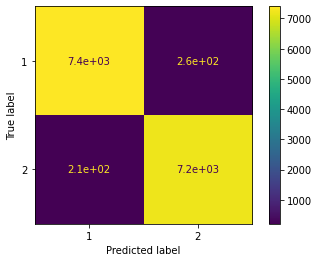

In [ ]:
plot_confusion_matrix(model_logit, X_test_set, Y_test_set);

In [ ]:
""" Pourcentage de bonnes prédictions """
print(((7435+7237)/15089)*100)

97.2363973755716


**Analyse :**

*   Sur les 15089 parties, notre modèle a prédit 14672 bons résultats et 417 mauvais résultats, soit un taux de 97,24% de bons résultats.
*   Sur les 7660 victoires de l'équipe 1 prédits, 7435 sont correctes (vrais positifs) et 225 sont fausses (faux négatifs).
*   Sur les 7429 défaites de l'équipe 1 prédits, 7237 sont correctes (vrais négatifs) et 192 sont fausses (faux positifs).

##### Amélioration

Voyons dans un premier temps si comme dans notre modèle de régression logistique, on constate une amélioration en ajoutant des variables prédictives (comme les *baronKills* par exemple).

In [ ]:
""" AJOUT DES BARONKILLS """

""" Création de nos échantillons pour entrainer notre modèle logit et pour le tester """

nb_total_parties = games.shape[0]
Y = games['winner']
Y = Y.values
X = games[['t1_towerKills','t2_towerKills','t1_inhibitorKills','t2_inhibitorKills','t1_baronKills','t2_baronKills']]
X = X.values

X_train_set, X_test_set = train_test_split(X, test_size=0.3, random_state=42, shuffle=True)

Y_train_set, Y_test_set = train_test_split(Y, test_size=0.3, random_state=42, shuffle=True)

""" On regarde les paramètres du modèle DecisionTreeClassifier """
model_decisiontree2 = DecisionTreeClassifier()
criterion = ["gini","entropy"]
splitter = ["best","random"]
max_depth = range(1,15)
#random_state=range(1,50) trop long à tester
grid_decisiontree2=GridSearchCV(estimator=model_decisiontree2,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter),cv=10)

grid_decisiontree2.fit(X_train_set,Y_train_set);
print("best score: ", grid_decisiontree.best_score_)
print("best param: ", grid_decisiontree.best_params_)

model_decisiontree2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7)

model_decisiontree2.fit(X_train_set, Y_train_set)

Y_predictions_set = model_decisiontree2.predict(X_test_set)

confusion_matrix(Y_test_set,Y_predictions_set)

best score:  0.9705732407503035
best param:  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


array([[7429,  231],
       [ 180, 7249]])

Nous avons des résultats qui ont très peu varié. Cette fois-ci on a 6 erreurs de plus en ce qui concerne les victoires de l'équipe 1 et 12 erreurs de moins pour les défaites de l'équipe 1.

### Conclusion

Nous avons obtenu de très bon résultats pour nos 2 modèles pour prédire la victoire ou la défaite d'une équipe (environ 97% de réussite). Nous pouvons difficilement faire mieux comme score vu la complexité du jeu et les évènements qui peuvent survenir au cours d'une partie (déconnection d'un joueur, abandon précipité d'une équipe, etc). 

On pourrait également envisager d'étudier les parties en fonction des champions qu'utilisent les joueurs. Tous les champions n'ont pas le même taux de victoires. Cela pourrait changer quelques pourcentages mais cela reste assez minime, surtout qu'il nous faudrait beaucoup plus de parties à analyser pour étudier correctement le taux de victoire des champions. Des champions comme Aurélion Sol ou Ivern ont été très peu joués dans nos 50 000 parties.

Il serait intéressant de faire la même chose pour une dataframe regroupant plein de parties de joueurs professionnels. Les statistiques obtenues en observant des joueurs professionnels sont la plupart du temps bien plus révélatrices pour savoir si un champion est trop fort par exemple.